# Task-2 Using Unsupervised ML Alogrithm

### Author : Padam Rai

## Using K-Means Clustering Algorithm on Iris Dataset

It is one of the simplest and Popular unsupervised clustering algorithm.
The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

### Importing Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

In [2]:
#Now converting our dataset into pandas
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Cheking target names in our dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#checking features name in our dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#Checking data in the dataset
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Elbow Method
#Now checking Optimal K-value for our model by using elbow method

In [6]:
X = df.iloc[:, [0, 1, 2, 3]].values

k_range = range(1, 10)
sse = [] #sum of squared Error

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_) #this function is used to calculate the sum of square error
sse

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 29.990426406926414,
 28.12412926108979]

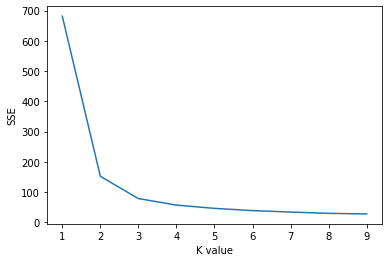

In [7]:
#Now plotting the Optimization value on the graph to check which value is perfect for our classification
plt.xlabel("K value")
plt.ylabel("SSE")
plt.plot(k_range, sse)

In the above graph we can easily check according to Elbow method k value 3 is optimal for our classification

In [8]:
#Now Training our model by using k value is 3
km = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_predicted = km.fit_predict(X)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
#Checking centroid of the model
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

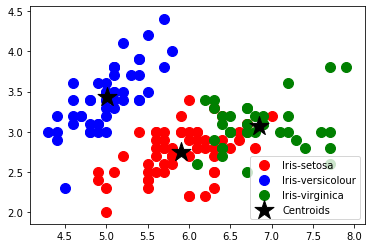

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_predicted == 0, 0], X[y_predicted == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_predicted == 1, 0], X[y_predicted == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_predicted == 2, 0], X[y_predicted == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 400, marker="*" ,c = 'black', label = 'Centroids')

plt.legend()

In [11]:
df_compare = pd.DataFrame({"Actual Values":iris.target, 'Predicted Values':y_predicted})
df_compare

,Actual Values,Predicted Values
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,2
146,2,0
147,2,2
148,2,2


In [12]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

In [13]:
#Making list to predict name of the target value 0=>setosa, 1=>versicolor, 2=>virginica
target_names = ['setosa', 'versicolor', 'virginica']
target_names

['setosa', 'versicolor', 'virginica']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

In [15]:
Kmean = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Kmean.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
km_predict = Kmean.predict(X_test)

In [17]:
#User Prediction By providing features
user_predict = Kmean.predict([[6.7, 3.3, 5.7, 2.5]])
for i in user_predict:
    print(target_names[i])

virginica
